In [102]:
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score
import statsmodels.formula.api as smf

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics

import statsmodels.formula.api as smf
%matplotlib inline

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


In [88]:
df = pd.read_csv('../csv/combined.csv')
df = df.dropna()

In [123]:
y = df[['Sales']]
X = df[['Customers','DayOfWeek',
       'Open', 'Promo', 'SchoolHoliday',
       'Assortment', 'CompetitionDistance', 'Promo2', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d']]



In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [237]:
def plot_regression(x, est, x_dot, y_dot, predictor, response) :
    # plot lstat (% lower status of the population) against median value
    plt.figure(figsize=(6 * 1.618, 6))
    plt.scatter(x_dot, y_dot, s=10, alpha=0.3)
    plt.xlabel(predictor)
    plt.ylabel(response)
    
    plt.plot(x, est.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % est.rsquared, 
         alpha=0.9)
    
    plt.legend()
    

    
    

In [149]:
train, test = train_test_split(df, test_size = 0.2)



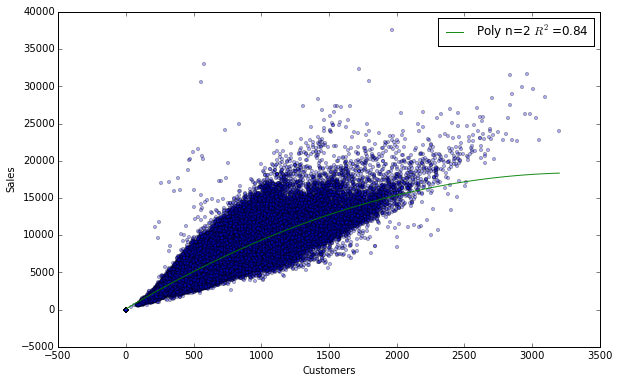

In [238]:
## 2nd degree polynomial plot 

x = pd.DataFrame({'Customers': np.linspace(train.Customers.min(), train.Customers.max(), 100)})
poly_2 = smf.ols(formula='Sales ~ 1 + Customers + I(Customers ** 2.0)', data=train).fit()
x_dot = train.Customers
y_dot = train.Sales

plot_regression(x,poly_2,x_dot,y_dot,'Customers','Sales')

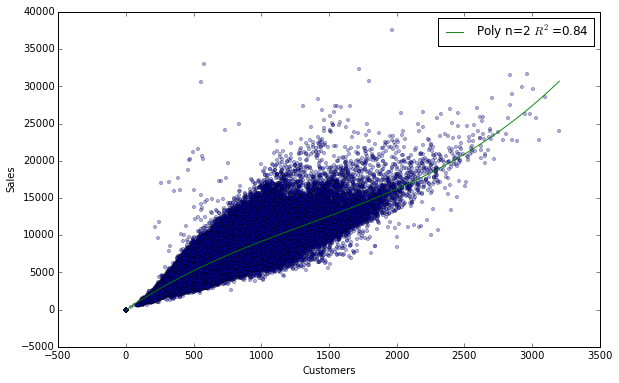

In [239]:
# 3-rd order polynomial
poly_3 = smf.ols(formula='Sales ~ 1 + Customers + I(Customers ** 2.0) + I(Customers ** 3.0)', data=df).fit()
plot_regression(x,poly_3,x_dot,y_dot,'Customers','Sales')

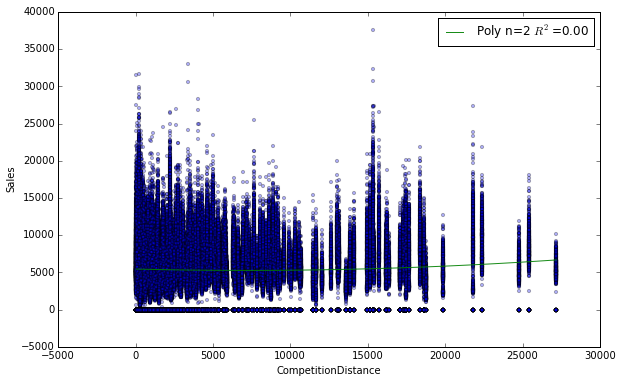

In [240]:
x = pd.DataFrame({'CompetitionDistance': np.linspace(train.CompetitionDistance.min(), train.CompetitionDistance.max(), 100)})
poly_2 = smf.ols(formula='Sales ~ 1 + CompetitionDistance + I(CompetitionDistance ** 2.0)', data=train).fit()
x_dot = train.CompetitionDistance


plot_regression(x,poly_2,x_dot,y_dot,'CompetitionDistance','Sales')

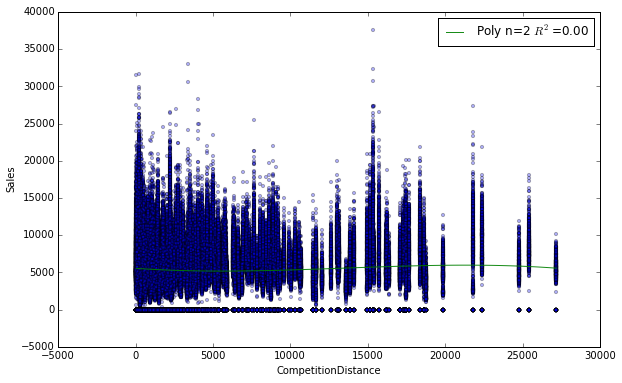

In [241]:
poly_3 = smf.ols(formula='Sales ~ 1 + CompetitionDistance + I(CompetitionDistance ** 2.0) + I(CompetitionDistance ** 3.0)', data=df).fit()


plot_regression(x,poly_3,x_dot,y_dot,'CompetitionDistance','Sales')

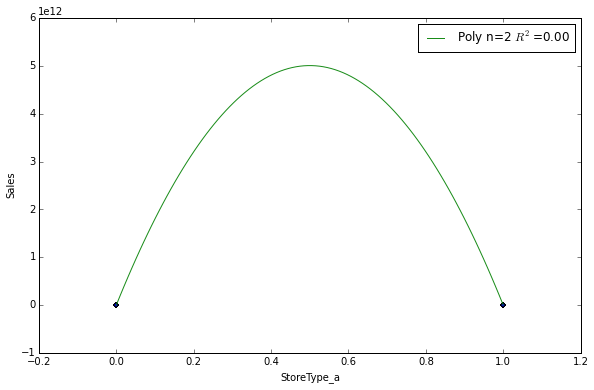

In [242]:
x = pd.DataFrame({'StoreType_a': np.linspace(train.StoreType_a.min(), train.StoreType_a.max(), 100)})
poly_2 = smf.ols(formula='Sales ~ 1 + StoreType_a + I(StoreType_a ** 2.0)', data=train).fit()
x_dot = train.StoreType_a


plot_regression(x,poly_2,x_dot,y_dot,'StoreType_a','Sales')